MARKOV ICL - MATRIX TREE THEOREM (K matrix formulation)
K=75, D=8, N=6, B=2, nodes=15
Device: cpu

Creating GMM...
Generating data...

Creating model...
  Initialized Matrix Tree method (rate matrix K formulation)
  Parameters: 12,915

Training...
Epoch  10 | Train: 0.1486 | Val: 0.1519
Epoch  20 | Train: 0.0975 | Val: 0.1064
Epoch  30 | Train: 0.0709 | Val: 0.0821
Epoch  40 | Train: 0.0561 | Val: 0.0693
Epoch  50 | Train: 0.0460 | Val: 0.0609
Epoch  60 | Train: 0.0388 | Val: 0.0547
Epoch  70 | Train: 0.0330 | Val: 0.0491
Epoch  80 | Train: 0.0282 | Val: 0.0448
Epoch  90 | Train: 0.0240 | Val: 0.0399
Epoch 100 | Train: 0.0205 | Val: 0.0356
Epoch 110 | Train: 0.0175 | Val: 0.0318
Epoch 120 | Train: 0.0149 | Val: 0.0282
Epoch 130 | Train: 0.0128 | Val: 0.0252
Epoch 140 | Train: 0.0109 | Val: 0.0224
Epoch 150 | Train: 0.0092 | Val: 0.0198
Epoch 160 | Train: 0.0078 | Val: 0.0173
Epoch 170 | Train: 0.0067 | Val: 0.0153
Epoch 180 | Train: 0.0058 | Val: 0.0133
Epoch 190 | Train: 0.0050 | Val:

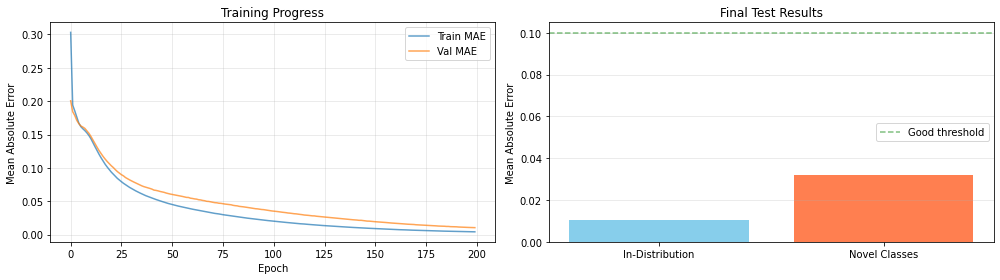

In [2]:
# Import necessary components
import torch
import numpy as np
from markov_icl_gmm_matrix_tree import (
    GaussianMixtureModel, 
    generate_icl_gmm_data, 
    ICLGMMDataset,
    collate_fn,
    MatrixTreeMarkovICL,
    train_model,
    test_icl
)
from torch.utils.data import DataLoader
import os
import time

# Set parameters
params = {
    'K': 75,              # Number of GMM classes
    'D': 8,               # Dimension
    'N': 6,               # Context examples
    'B': 2,               # Burstiness
    'n_nodes': 15,        # Markov nodes
    'epochs': 200,        # Training epochs
    'lr': 0.001,          # Learning rate
    'batch_size': 64,
    'train_samples': 10000,
    'val_samples': 2000,
    'epsilon': 0.1,       # Within-class noise
    'seed': 42,
    'exact_copy': True,    # Query is exact copy of context item
    'method': 'direct_solve'
}

print("="*70)
print("MARKOV ICL - MATRIX TREE THEOREM (K matrix formulation)")
print("="*70)
print(f"K={params['K']}, D={params['D']}, N={params['N']}, B={params['B']}, nodes={params['n_nodes']}")
print("="*70)

# Set random seeds
torch.manual_seed(params['seed'])
np.random.seed(params['seed'])

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}\n")

# Create GMM
print("Creating GMM...")
gmm = GaussianMixtureModel(K=params['K'], D=params['D'], epsilon=params['epsilon'], seed=params['seed'])

# Generate data
print("Generating data...")
train_data = generate_icl_gmm_data(gmm, params['train_samples'], params['N'], 
                                   novel_classes=False, exact_copy=params['exact_copy'], B=params['B'])
val_data = generate_icl_gmm_data(gmm, params['val_samples'], params['N'], 
                                 novel_classes=False, exact_copy=params['exact_copy'], B=params['B'])

train_loader = DataLoader(ICLGMMDataset(train_data), batch_size=params['batch_size'],
                          shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(ICLGMMDataset(val_data), batch_size=params['batch_size'],
                       collate_fn=collate_fn)

# Create model
print("\nCreating model...")
model = MatrixTreeMarkovICL(n_nodes=params['n_nodes'], z_dim=params['D'], n_labels=1, N=params['N'])

# Train
start_time = time.time()
print("\nTraining...")
print("="*70)
history = train_model(model, train_loader, val_loader, device, 
                     n_epochs=params['epochs'], lr=params['lr'], method=params['method'])
end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Test
results = test_icl(model, gmm, params['N'], device, n_samples=1000, 
                  exact_copy=params['exact_copy'], B=params['B'], method=params['method'])

# Save model
os.makedirs('results', exist_ok=True)
model_path = f'results/markov_icl_gmm_K{params["K"]}_N{params["N"]}_mtree.pt'
torch.save(model.state_dict(), model_path)
print(f"\n✓ Saved: {model_path}")

# You can also plot the training history
try:
    import matplotlib.pyplot as plt
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    
    ax1.plot(history['train_mae'], label='Train MAE', alpha=0.7)
    ax1.plot(history['val_mae'], label='Val MAE', alpha=0.7)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Mean Absolute Error')
    ax1.set_title('Training Progress')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Bar chart of final results
    ax2.bar(['In-Distribution', 'Novel Classes'], 
            [results['in_dist'], results['novel_classes']],
            color=['skyblue', 'coral'])
    ax2.set_ylabel('Mean Absolute Error')
    ax2.set_title('Final Test Results')
    ax2.axhline(y=0.1, color='g', linestyle='--', label='Good threshold', alpha=0.5)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("\n(Install matplotlib to see training plots)")

In [ ]:
======================================================================
MARKOV ICL - MATRIX TREE THEOREM (K matrix formulation)
======================================================================
K=75, D=8, N=6, B=2, nodes=15
======================================================================
Device: cpu

Creating GMM...
Generating data...

Creating model...
  Initialized Matrix Tree method (rate matrix K formulation)
  Parameters: 12,915

Training...
======================================================================
Epoch  10 | Train: 0.1486 | Val: 0.1519
Epoch  20 | Train: 0.0975 | Val: 0.1064
Epoch  30 | Train: 0.0709 | Val: 0.0821
Epoch  40 | Train: 0.0561 | Val: 0.0693
Epoch  50 | Train: 0.0460 | Val: 0.0609
Epoch  60 | Train: 0.0388 | Val: 0.0547
Epoch  70 | Train: 0.0330 | Val: 0.0491
Epoch  80 | Train: 0.0282 | Val: 0.0448
Epoch  90 | Train: 0.0240 | Val: 0.0399
Epoch 100 | Train: 0.0205 | Val: 0.0356
Epoch 110 | Train: 0.0175 | Val: 0.0318
Epoch 120 | Train: 0.0149 | Val: 0.0282
Epoch 130 | Train: 0.0128 | Val: 0.0252
Epoch 140 | Train: 0.0109 | Val: 0.0224
Epoch 150 | Train: 0.0092 | Val: 0.0198
Epoch 160 | Train: 0.0078 | Val: 0.0173
Epoch 170 | Train: 0.0067 | Val: 0.0153
Epoch 180 | Train: 0.0058 | Val: 0.0133
Epoch 190 | Train: 0.0050 | Val: 0.0119
Epoch 200 | Train: 0.0043 | Val: 0.0106
Training time: 89.04 seconds

======================================================================
TESTING IN-CONTEXT LEARNING
======================================================================

1. In-Distribution Test:
   MAE: 0.1353

2. Out-of-Distribution Test (TRUE ICL):
   MAE: 0.1471

======================================================================
  In-Distribution:  0.1353
  Novel Classes:    0.1471
  ○ PARTIAL ICL
======================================================================

✓ Saved: results/markov_icl_gmm_K75_N6_mtree.pt

In [7]:
import torch
import time
import numpy as np

def compute_rate_matrix_K(batch_size=1, n_nodes=10, seed=42):
    """Create a random rate matrix K with columns summing to zero."""
    torch.manual_seed(seed)
    
    # Random off-diagonal rates (positive)
    rates = torch.rand(batch_size, n_nodes, n_nodes) * 0.5
    
    # Zero out diagonal
    eye = torch.eye(n_nodes).unsqueeze(0).expand(batch_size, -1, -1)
    rates = rates * (1 - eye)
    
    # Set diagonal so columns sum to zero
    col_sums = rates.sum(dim=1)  # Sum over rows
    K_batch = rates - torch.diag_embed(col_sums)
    
    # Verify columns sum to zero
    col_check = K_batch.sum(dim=1).abs().max().item()
    print(f"Max column sum (should be ~0): {col_check:.2e}")
    
    return K_batch


def matrix_tree_steady_state(K_batch):
    """Compute steady state using Matrix Tree Theorem."""
    batch_size, n = K_batch.shape[0], K_batch.shape[1]
    device = K_batch.device
    
    p_batch = torch.zeros(batch_size, n, device=device)
    
    for i in range(n):
        # Delete row i and column i
        indices = [j for j in range(n) if j != i]
        K_minor = K_batch[:, indices, :][:, :, indices]
        
        # Compute determinant
        det = torch.det(K_minor)
        det = torch.abs(det)
        det = torch.clamp(det, min=1e-10, max=1e10)
        
        p_batch[:, i] = det
    
    # Normalize
    Z = p_batch.sum(dim=1, keepdim=True)
    Z = torch.clamp(Z, min=1e-8)
    p_batch = p_batch / Z
    
    return p_batch


def direct_solve_steady_state(K_batch):
    """Solve by replacing last row with normalization constraint."""
    batch_size, n = K_batch.shape[0], K_batch.shape[1]
    device = K_batch.device
    
    # Modify K: replace last row with [1, 1, 1, ..., 1]
    K_modified = K_batch.clone()
    K_modified[:, -1, :] = 1.0
    
    # RHS: [0, 0, ..., 0, 1]
    b = torch.zeros(batch_size, n, device=device)
    b[:, -1] = 1.0
    
    # Solve K_modified @ p = b
    p_batch = torch.linalg.solve(K_modified, b)
    
    # Ensure non-negativity and normalization
    p_batch = torch.clamp(p_batch, min=0.0)
    p_batch = p_batch / p_batch.sum(dim=1, keepdim=True)
    
    return p_batch


def verify_steady_state(K_batch, p_batch, method_name):
    """Verify that K @ p ≈ 0."""
    batch_size = K_batch.shape[0]
    
    for b in range(batch_size):
        K = K_batch[b]
        p = p_batch[b]
        
        # Check K @ p ≈ 0
        residual = torch.matmul(K, p)
        max_residual = torch.abs(residual).max().item()
        
        # Check sum(p) = 1
        sum_p = p.sum().item()
        
        # Check all p_i >= 0
        min_p = p.min().item()
        
        print(f"\n{method_name} - Batch {b}:")
        print(f"  Max |K@p| (should be ~0): {max_residual:.2e}")
        print(f"  Sum(p) (should be 1):     {sum_p:.6f}")
        print(f"  Min(p) (should be ≥0):    {min_p:.6f}")


def compare_methods(n_nodes=10, batch_size=1, n_trials=10):
    """Compare Matrix Tree vs Direct Solve methods."""
    print("="*70)
    print(f"COMPARING STEADY STATE METHODS")
    print(f"  n_nodes: {n_nodes}, batch_size: {batch_size}, trials: {n_trials}")
    print("="*70)
    
    # Create test rate matrix
    K_batch = compute_rate_matrix_K(batch_size=batch_size, n_nodes=n_nodes)
    
    # ========== METHOD 1: MATRIX TREE THEOREM ==========
    print("\n" + "-"*70)
    print("METHOD 1: Matrix Tree Theorem")
    print("-"*70)
    
    # Warmup
    _ = matrix_tree_steady_state(K_batch)
    
    # Time it
    start = time.time()
    for _ in range(n_trials):
        p_mtt = matrix_tree_steady_state(K_batch)
    time_mtt = (time.time() - start) / n_trials
    
    print(f"\nTime per call: {time_mtt*1000:.2f} ms")
    verify_steady_state(K_batch, p_mtt, "Matrix Tree")
    
    # ========== METHOD 2: DIRECT SOLVE ==========
    print("\n" + "-"*70)
    print("METHOD 2: Direct Solve")
    print("-"*70)
    
    # Warmup
    _ = direct_solve_steady_state(K_batch)
    
    # Time it
    start = time.time()
    for _ in range(n_trials):
        p_direct = direct_solve_steady_state(K_batch)
    time_direct = (time.time() - start) / n_trials
    
    print(f"\nTime per call: {time_direct*1000:.2f} ms")
    verify_steady_state(K_batch, p_direct, "Direct Solve")
    
    # ========== COMPARISON ==========
    print("\n" + "="*70)
    print("COMPARISON")
    print("="*70)
    
    # Compare distributions
    diff = torch.abs(p_mtt - p_direct).max().item()
    rel_diff = (torch.abs(p_mtt - p_direct) / (p_mtt + 1e-10)).max().item()
    
    print(f"\nDistribution comparison:")
    print(f"  Max absolute difference: {diff:.2e}")
    print(f"  Max relative difference: {rel_diff:.2e}")
    
    if diff < 1e-5:
        print("  ✓ Methods agree to high precision!")
    elif diff < 1e-3:
        print("  ✓ Methods agree reasonably well")
    else:
        print("  ⚠ Methods show significant differences")
    
    # Speed comparison
    speedup = time_mtt / time_direct
    print(f"\nSpeed comparison:")
    print(f"  Matrix Tree: {time_mtt*1000:.3f} ms")
    print(f"  Direct Solve: {time_direct*1000:.3f} ms")
    print(f"  Speedup: {speedup:.1f}x faster")
    
    # Show actual distributions (first batch)
    print(f"\nSteady state distributions (first batch):")
    print(f"{'Node':<6} {'Matrix Tree':<15} {'Direct Solve':<15} {'Difference':<15}")
    print("-"*55)
    for i in range(min(n_nodes, 10)):  # Show first 10 nodes
        print(f"{i:<6} {p_mtt[0,i]:.8f}      {p_direct[0,i]:.8f}      {abs(p_mtt[0,i]-p_direct[0,i]):.2e}")
    if n_nodes > 10:
        print(f"... ({n_nodes-10} more nodes)")
    
    print("\n" + "="*70)
    return p_mtt, p_direct, time_mtt, time_direct


# ========== RUN TESTS ==========
if __name__ == "__main__":
    print("\n### TEST 1: Small system (10 nodes, single batch)")
    compare_methods(n_nodes=10, batch_size=1, n_trials=100)
    
    print("\n\n### TEST 2: Medium system (20 nodes, single batch)")
    compare_methods(n_nodes=20, batch_size=1, n_trials=20)
    
    print("\n\n### TEST 3: Small system with batching (10 nodes, 64 batch)")
    compare_methods(n_nodes=10, batch_size=64, n_trials=10)
    
    print("\n\n### TEST 4: Realistic ICL setup (15 nodes, 64 batch)")
    compare_methods(n_nodes=15, batch_size=64, n_trials=10)


### TEST 1: Small system (10 nodes, single batch)
COMPARING STEADY STATE METHODS
  n_nodes: 10, batch_size: 1, trials: 100
Max column sum (should be ~0): 1.19e-07

----------------------------------------------------------------------
METHOD 1: Matrix Tree Theorem
----------------------------------------------------------------------

Time per call: 0.74 ms

Matrix Tree - Batch 0:
  Max |K@p| (should be ~0): 1.04e-07
  Sum(p) (should be 1):     1.000000
  Min(p) (should be ≥0):    0.048539

----------------------------------------------------------------------
METHOD 2: Direct Solve
----------------------------------------------------------------------

Time per call: 0.06 ms

Direct Solve - Batch 0:
  Max |K@p| (should be ~0): 6.71e-08
  Sum(p) (should be 1):     1.000000
  Min(p) (should be ≥0):    0.048539

COMPARISON

Distribution comparison:
  Max absolute difference: 5.96e-08
  Max relative difference: 3.80e-07
  ✓ Methods agree to high precision!

Speed comparison:
  Matrix Tre